# SQL CARTO QUERY FUNCTION
# written for PUI2016_Python2

In [1]:
#Extra Credit

SQL_SOURCE = 'https://yixuantang.carto.com/api/v2/sql?q='

#import urllib2
#import urllib
#import StringIO

try:
    #import urllib2
    from urllib2 import HTTPError
    from urllib2 import urlopen
    from urllib import urlencode
    from StringIO import StringIO as StringIO

except ImportError:
    #import urllib
    from urllib.error import HTTPError
    from urllib.request import urlopen, Request
    from urllib.parse import urlencode
    from io import BytesIO as StringIO
    
import ast
import pandas as pd

def queryCartoDB(query, format='CSV', source=SQL_SOURCE):
    '''queries carto datasets from a given carto account
    Arguments: 
    query - string: a valid sql query string
    format - outlut format  OPTIONAL (default CSV)
    source - a valid sql api endpoint OPTIONAL (default carto fb55 account)
    Returns:
    the return of the sql query AS A STRING
    NOTES:
    designed for the carto API, tested only with CSV return format'''
    
    data = urlencode({'format': format, 'q': query}).encode("utf-8")
    try:
        response = urlopen(source, data)
    except HTTPError as e:
        raise ValueError('\n'.join(ast.literal_eval(e.readline())['error']))
    except Exception:
        raise
    return response.read()

In [2]:
test = '''
SELECT *
FROM citibike
'''

In [3]:
citibike = pd.read_csv(StringIO(queryCartoDB(test)), sep=',')
citibike.head()

,cartodb_id,the_geom,the_geom_webmercator,gender,birth_year,bikeid,end_station_id,start_station_id,tripduration,usertype,end_station_name,start_station_name,end_station_longitude,end_station_latitude,start_station_longitude,start_station_latitude,stoptime,starttime
0,5960,NaN,NaN,1,1965.0,19217,462,435,351,Subscriber,W 22 St & 10 Ave,W 21 St & 6 Ave,-74.004519,40.746920,-73.994156,40.741740,2015-02-01 20:42:00+00,2015-02-01 20:36:00+00
1,9806,NaN,NaN,1,1971.0,17575,488,167,643,Subscriber,W 39 St & 9 Ave,E 39 St & 3 Ave,-73.993722,40.756458,-73.976049,40.748901,2015-02-03 14:50:00+00,2015-02-03 14:39:00+00
2,13113,NaN,NaN,1,1973.0,20313,440,332,1379,Subscriber,E 45 St & 3 Ave,Cherry St,-73.972826,40.752554,-73.979481,40.712199,2015-02-04 07:30:00+00,2015-02-04 07:07:00+00
3,1,NaN,NaN,2,1978.0,17131,423,521,801,Subscriber,W 54 St & 9 Ave,8 Ave & W 31 St,-73.986905,40.765849,-73.994811,40.750450,2015-02-01 00:14:00+00,2015-02-01 00:00:00+00
4,2,NaN,NaN,1,1993.0,21289,504,497,379,Subscriber,1 Ave & E 15 St,E 17 St & Broadway,-73.981656,40.732219,-73.990093,40.737050,2015-02-01 00:07:00+00,2015-02-01 00:00:00+00


## Task 1 — Familiarize with SQL Clauses

In [4]:
#Sort data by start_station_id. Only checking trips with duration <= 3 hours
Sort1 = '''
SELECT * FROM citibike
WHERE tripduration < 3*60*60
ORDER BY start_station_id DESC
'''
citibike_sortID = pd.read_csv(StringIO(queryCartoDB(Sort1)), sep=',')
citibike_sortID.head()

,cartodb_id,the_geom,the_geom_webmercator,gender,birth_year,bikeid,end_station_id,start_station_id,tripduration,usertype,end_station_name,start_station_name,end_station_longitude,end_station_latitude,start_station_longitude,start_station_latitude,stoptime,starttime
0,10685,NaN,NaN,1,1978.0,18397,238,3002,1085,Subscriber,Bank St & Washington St,South End Ave & Liberty St,-74.008592,40.736197,-74.015756,40.711512,2015-02-03 17:37:00+00,2015-02-03 17:18:00+00
1,32618,NaN,NaN,2,1978.0,20131,327,3002,150,Subscriber,Vesey Pl & River Terrace,South End Ave & Liberty St,-74.016584,40.715338,-74.015756,40.711512,2015-02-06 09:05:00+00,2015-02-06 09:02:00+00
2,38837,NaN,NaN,1,1997.0,17310,128,3002,1031,Subscriber,MacDougal St & Prince St,South End Ave & Liberty St,-74.002971,40.727103,-74.015756,40.711512,2015-02-06 20:57:00+00,2015-02-06 20:40:00+00
3,38836,NaN,NaN,1,1998.0,15090,128,3002,1045,Subscriber,MacDougal St & Prince St,South End Ave & Liberty St,-74.002971,40.727103,-74.015756,40.711512,2015-02-06 20:57:00+00,2015-02-06 20:40:00+00
4,37215,NaN,NaN,1,1984.0,18718,2008,3002,208,Subscriber,Little West St & 1 Pl,South End Ave & Liberty St,-74.016777,40.705693,-74.015756,40.711512,2015-02-06 18:04:00+00,2015-02-06 18:00:00+00


In [5]:
#Sort data by tripduration. Only checking trips with duration <= 3 hours
Sort2 = '''
SELECT * FROM citibike
WHERE tripduration < 3*60*60
ORDER BY tripduration DESC
'''
citibike_sortDu = pd.read_csv(StringIO(queryCartoDB(Sort2)), sep=',')
citibike_sortDu.head()

,cartodb_id,the_geom,the_geom_webmercator,gender,birth_year,bikeid,end_station_id,start_station_id,tripduration,usertype,end_station_name,start_station_name,end_station_longitude,end_station_latitude,start_station_longitude,start_station_latitude,stoptime,starttime
0,41392,NaN,NaN,1,1973.0,15082,173,284,10757,Subscriber,Broadway & W 49 St,Greenwich Ave & 8 Ave,-73.984427,40.760647,-74.002638,40.739017,2015-02-07 15:16:00+00,2015-02-07 12:17:00+00
1,10912,NaN,NaN,1,1950.0,16099,435,512,10660,Subscriber,W 21 St & 6 Ave,W 29 St & 9 Ave,-73.994156,40.741740,-73.998393,40.750073,2015-02-03 20:40:00+00,2015-02-03 17:42:00+00
2,40221,NaN,NaN,1,1983.0,21323,405,405,10174,Subscriber,Washington St & Gansevoort St,Washington St & Gansevoort St,-74.008119,40.739323,-74.008119,40.739323,2015-02-07 12:20:00+00,2015-02-07 09:31:00+00
3,7472,NaN,NaN,2,1987.0,19921,264,386,9969,Subscriber,Maiden Ln & Pearl St,Centre St & Worth St,-74.007319,40.707065,-74.002345,40.714948,2015-02-02 21:08:00+00,2015-02-02 18:22:00+00
4,9696,NaN,NaN,1,1970.0,19070,2023,468,9938,Subscriber,E 55 St & Lexington Ave,Broadway & W 55 St,-73.970314,40.759681,-73.981923,40.765265,2015-02-03 16:55:00+00,2015-02-03 14:10:00+00


In [6]:
#Only show the top/last 10 records (aka head and tail in SQL) 
head10 = '''
SELECT * FROM citibike
ORDER BY start_station_id
LIMIT 10 '''

HEAD10 = pd.read_csv(StringIO(queryCartoDB(head10)), sep=',')
HEAD10

,cartodb_id,the_geom,the_geom_webmercator,gender,birth_year,bikeid,end_station_id,start_station_id,tripduration,usertype,end_station_name,start_station_name,end_station_longitude,end_station_latitude,start_station_longitude,start_station_latitude,stoptime,starttime
0,3302,NaN,NaN,1,1981.0,17429,499,72,569,Subscriber,Broadway & W 60 St,W 52 St & 11 Ave,-73.981918,40.769155,-73.993929,40.767272,2015-02-01 15:01:00+00,2015-02-01 14:52:00+00
1,1527,NaN,NaN,1,1977.0,16524,212,72,962,Subscriber,W 16 St & The High Line,W 52 St & 11 Ave,-74.006818,40.743349,-73.993929,40.767272,2015-02-01 12:03:00+00,2015-02-01 11:47:00+00
2,2142,NaN,NaN,1,1982.0,19672,478,72,339,Subscriber,11 Ave & W 41 St,W 52 St & 11 Ave,-73.998842,40.760301,-73.993929,40.767272,2015-02-01 13:00:00+00,2015-02-01 12:54:00+00
3,2282,NaN,NaN,1,1974.0,18174,447,72,301,Subscriber,8 Ave & W 52 St,W 52 St & 11 Ave,-73.985162,40.763707,-73.993929,40.767272,2015-02-01 13:13:00+00,2015-02-01 13:08:00+00
4,387,NaN,NaN,2,1972.0,20786,212,72,961,Subscriber,W 16 St & The High Line,W 52 St & 11 Ave,-74.006818,40.743349,-73.993929,40.767272,2015-02-01 08:54:00+00,2015-02-01 08:38:00+00
5,649,NaN,NaN,2,1986.0,14692,2021,72,344,Subscriber,W 45 St & 8 Ave,W 52 St & 11 Ave,-73.988597,40.759291,-73.993929,40.767272,2015-02-01 09:54:00+00,2015-02-01 09:49:00+00
6,1230,NaN,NaN,1,1969.0,17541,212,72,934,Subscriber,W 16 St & The High Line,W 52 St & 11 Ave,-74.006818,40.743349,-73.993929,40.767272,2015-02-01 11:30:00+00,2015-02-01 11:14:00+00
7,1983,NaN,NaN,0,NaN,17849,328,72,1944,Customer,Watts St & Greenwich St,W 52 St & 11 Ave,-74.009660,40.724055,-73.993929,40.767272,2015-02-01 13:12:00+00,2015-02-01 12:39:00+00
8,5136,NaN,NaN,1,1983.0,16427,529,72,455,Subscriber,W 42 St & 8 Ave,W 52 St & 11 Ave,-73.990985,40.757570,-73.993929,40.767272,2015-02-01 18:03:00+00,2015-02-01 17:55:00+00
9,3957,NaN,NaN,1,1991.0,15282,514,72,387,Subscriber,12 Ave & W 40 St,W 52 St & 11 Ave,-74.002777,40.760875,-73.993929,40.767272,2015-02-01 16:03:00+00,2015-02-01 15:57:00+00


In [7]:
tail10 = '''
SELECT * FROM citibike
ORDER BY start_station_id DESC
LIMIT 10 '''

TAIL10 = pd.read_csv(StringIO(queryCartoDB(tail10)), sep=',')
TAIL10

,cartodb_id,the_geom,the_geom_webmercator,gender,birth_year,bikeid,end_station_id,start_station_id,tripduration,usertype,end_station_name,start_station_name,end_station_longitude,end_station_latitude,start_station_longitude,start_station_latitude,stoptime,starttime
0,1228,NaN,NaN,0,NaN,17849,525,3002,1900,Customer,W 34 St & 11 Ave,South End Ave & Liberty St,-74.002116,40.755942,-74.015756,40.711512,2015-02-01 11:45:00+00,2015-02-01 11:14:00+00
1,1863,NaN,NaN,1,1996.0,19309,358,3002,689,Subscriber,Christopher St & Greenwich St,South End Ave & Liberty St,-74.007114,40.732916,-74.015756,40.711512,2015-02-01 12:36:00+00,2015-02-01 12:25:00+00
2,1472,NaN,NaN,2,1980.0,16987,308,3002,683,Subscriber,St James Pl & Oliver St,South End Ave & Liberty St,-73.998512,40.713079,-74.015756,40.711512,2015-02-01 11:55:00+00,2015-02-01 11:43:00+00
3,1506,NaN,NaN,0,NaN,21202,499,3002,7225,Customer,Broadway & W 60 St,South End Ave & Liberty St,-73.981918,40.769155,-74.015756,40.711512,2015-02-01 13:47:00+00,2015-02-01 11:46:00+00
4,1587,NaN,NaN,1,1959.0,15748,355,3002,858,Subscriber,Bayard St & Baxter St,South End Ave & Liberty St,-73.999744,40.716021,-74.015756,40.711512,2015-02-01 12:07:00+00,2015-02-01 11:53:00+00
5,1628,NaN,NaN,1,1980.0,20901,369,3002,745,Subscriber,Washington Pl & 6 Ave,South End Ave & Liberty St,-74.000264,40.732241,-74.015756,40.711512,2015-02-01 12:09:00+00,2015-02-01 11:57:00+00
6,293,NaN,NaN,2,1980.0,19484,417,3002,301,Subscriber,Barclay St & Church St,South End Ave & Liberty St,-74.010202,40.712912,-74.015756,40.711512,2015-02-01 07:54:00+00,2015-02-01 07:49:00+00
7,1333,NaN,NaN,0,NaN,18288,360,3002,1243,Customer,William St & Pine St,South End Ave & Liberty St,-74.008873,40.707179,-74.015756,40.711512,2015-02-01 11:48:00+00,2015-02-01 11:27:00+00
8,2205,NaN,NaN,1,1979.0,17004,368,3002,790,Subscriber,Carmine St & 6 Ave,South End Ave & Liberty St,-74.002150,40.730386,-74.015756,40.711512,2015-02-01 13:14:00+00,2015-02-01 13:01:00+00
9,2026,NaN,NaN,2,1984.0,18386,147,3002,307,Subscriber,Greenwich St & Warren St,South End Ave & Liberty St,-74.011220,40.715422,-74.015756,40.711512,2015-02-01 12:47:00+00,2015-02-01 12:42:00+00


In [8]:
#List all unique start_station_id values
sta_id ='''
SELECT MIN(start_station_id) as station_id FROM citibike 
GROUP BY start_station_id
ORDER BY station_id
'''
stations = pd.read_csv(StringIO(queryCartoDB(sta_id)), sep=',')
stations

,station_id,Unnamed: 1
0,72,NaN
1,79,NaN
2,82,NaN
3,83,NaN
4,116,NaN
5,119,NaN
6,120,NaN
7,127,NaN
8,128,NaN
9,137,NaN


In [9]:
#Aggregation functions
#Count the number of trips, the average/min/max trip duration
nums = '''SELECT count(tripduration) as numtrips,AVG(tripduration) as myavg,
MIN(tripduration) as mymin, MAX(tripduration) as mymax FROM citibike  '''
mynums = pd.read_csv(StringIO(queryCartoDB(nums)), sep=',')
mynums.head()

,numtrips,myavg,mymin,mymax
0,46200,675.865823,60,43016


## Task 2

In [10]:
#Selecting trips started on Feb-02-2015 only
Feb02 = '''
SELECT * FROM citibike 
TB where starttime >'2015-02-02' and starttime <'2015-02-03'
''' 

myday = pd.read_csv(StringIO(queryCartoDB(Feb02)), sep=',')
myday

,cartodb_id,the_geom,the_geom_webmercator,gender,birth_year,bikeid,end_station_id,start_station_id,tripduration,usertype,end_station_name,start_station_name,end_station_longitude,end_station_latitude,start_station_longitude,start_station_latitude,stoptime,starttime
0,6442,NaN,NaN,1,1992.0,20684,489,442,199,Subscriber,10 Ave & W 28 St,W 27 St & 7 Ave,-74.001768,40.750664,-73.993915,40.746647,2015-02-02 00:05:00+00,2015-02-02 00:02:00+00
1,6443,NaN,NaN,2,1964.0,16094,349,326,418,Subscriber,Rivington St & Ridge St,E 11 St & 1 Ave,-73.983299,40.718502,-73.984267,40.729538,2015-02-02 00:10:00+00,2015-02-02 00:03:00+00
2,6444,NaN,NaN,1,1974.0,17362,415,279,276,Subscriber,Pearl St & Hanover Square,Peck Slip & Front St,-74.009260,40.704718,-74.001670,40.707873,2015-02-02 00:09:00+00,2015-02-02 00:04:00+00
3,6445,NaN,NaN,2,1992.0,15475,237,496,420,Subscriber,E 11 St & 2 Ave,E 16 St & 5 Ave,-73.986724,40.730473,-73.992390,40.737262,2015-02-02 00:13:00+00,2015-02-02 00:06:00+00
4,6446,NaN,NaN,1,1968.0,16272,450,477,304,Subscriber,W 49 St & 8 Ave,W 41 St & 8 Ave,-73.987882,40.762272,-73.990026,40.756405,2015-02-02 00:12:00+00,2015-02-02 00:07:00+00
5,6447,NaN,NaN,1,1979.0,16370,391,467,622,Subscriber,Clark St & Henry St,Dean St & 4 Ave,-73.993446,40.697601,-73.978951,40.683125,2015-02-02 00:18:00+00,2015-02-02 00:08:00+00
6,6448,NaN,NaN,1,1963.0,19437,482,434,371,Subscriber,W 15 St & 7 Ave,9 Ave & W 18 St,-73.999318,40.739355,-74.003664,40.743174,2015-02-02 00:15:00+00,2015-02-02 00:09:00+00
7,6449,NaN,NaN,1,1982.0,21211,2008,330,477,Subscriber,Little West St & 1 Pl,Reade St & Broadway,-74.016777,40.705693,-74.005628,40.714505,2015-02-02 00:19:00+00,2015-02-02 00:11:00+00
8,6450,NaN,NaN,2,1978.0,21417,423,521,743,Subscriber,W 54 St & 9 Ave,8 Ave & W 31 St,-73.986905,40.765849,-73.994811,40.750450,2015-02-02 00:25:00+00,2015-02-02 00:12:00+00
9,6451,NaN,NaN,1,1956.0,15722,453,504,599,Subscriber,W 22 St & 8 Ave,1 Ave & E 15 St,-73.999154,40.744751,-73.981656,40.732219,2015-02-02 00:22:00+00,2015-02-02 00:12:00+00


In [11]:
#Selecting trips started on the weekends，what are average trip duration during weekends? 
weekend ='''
select * from citibike
where EXTRACT(DOW FROM starttime) not in (1,5)
order by starttime
'''

weekendtrip = pd.read_csv(StringIO(queryCartoDB(weekend)), sep=',')
weekendtrip

,cartodb_id,the_geom,the_geom_webmercator,gender,birth_year,bikeid,end_station_id,start_station_id,tripduration,usertype,end_station_name,start_station_name,end_station_longitude,end_station_latitude,start_station_longitude,start_station_latitude,stoptime,starttime
0,1,NaN,NaN,2,1978.0,17131,423,521,801,Subscriber,W 54 St & 9 Ave,8 Ave & W 31 St,-73.986905,40.765849,-73.994811,40.750450,2015-02-01 00:14:00+00,2015-02-01 00:00:00+00
1,2,NaN,NaN,1,1993.0,21289,504,497,379,Subscriber,1 Ave & E 15 St,E 17 St & Broadway,-73.981656,40.732219,-73.990093,40.737050,2015-02-01 00:07:00+00,2015-02-01 00:00:00+00
2,4,NaN,NaN,2,1985.0,21044,505,2004,818,Subscriber,6 Ave & W 33 St,6 Ave & Broome St,-73.988484,40.749013,-74.004704,40.724399,2015-02-01 00:15:00+00,2015-02-01 00:01:00+00
3,5,NaN,NaN,1,1957.0,19868,83,323,544,Subscriber,Atlantic Ave & Fort Greene Pl,Lawrence St & Willoughby St,-73.976323,40.683826,-73.986317,40.692362,2015-02-01 00:10:00+00,2015-02-01 00:01:00+00
4,3,NaN,NaN,2,1969.0,18903,127,281,2474,Subscriber,Barrow St & Hudson St,Grand Army Plaza & Central Park S,-74.006744,40.731724,-73.973715,40.764397,2015-02-01 00:42:00+00,2015-02-01 00:01:00+00
5,6,NaN,NaN,1,1979.0,15854,2002,373,717,Subscriber,Wythe Ave & Metropolitan Ave,Willoughby Ave & Walworth St,-73.963198,40.716887,-73.953820,40.693317,2015-02-01 00:14:00+00,2015-02-01 00:02:00+00
6,9,NaN,NaN,2,1985.0,21183,2012,335,759,Subscriber,E 27 St & 1 Ave,Washington Pl & Broadway,-73.976806,40.739445,-73.994046,40.729039,2015-02-01 00:17:00+00,2015-02-01 00:04:00+00
7,7,NaN,NaN,1,1983.0,15173,504,352,1306,Subscriber,1 Ave & E 15 St,W 56 St & 6 Ave,-73.981656,40.732219,-73.977225,40.763406,2015-02-01 00:26:00+00,2015-02-01 00:04:00+00
8,8,NaN,NaN,1,1955.0,17862,116,439,913,Subscriber,W 17 St & 8 Ave,E 4 St & 2 Ave,-74.001497,40.741776,-73.989780,40.726281,2015-02-01 00:19:00+00,2015-02-01 00:04:00+00
9,10,NaN,NaN,1,1982.0,14843,444,284,585,Subscriber,Broadway & W 24 St,Greenwich Ave & 8 Ave,-73.989151,40.742354,-74.002638,40.739017,2015-02-01 00:15:00+00,2015-02-01 00:05:00+00


In [12]:
avgweekend = '''
select AVG(tripduration) as mymean from citibike
where EXTRACT(DOW FROM starttime) not in (1,5)
'''

mymean1 = pd.read_csv(StringIO(queryCartoDB(avgweekend)), sep=',')
mymean1

,mymean,Unnamed: 1
0,675.169634,NaN


In [13]:
#Can we do the same for weekday?
weekday ='''
select * from citibike
where EXTRACT(DOW FROM starttime) in (1,5)
order by starttime
'''

weekdaytrip = pd.read_csv(StringIO(queryCartoDB(weekday)), sep=',')
weekdaytrip

,cartodb_id,the_geom,the_geom_webmercator,gender,birth_year,bikeid,end_station_id,start_station_id,tripduration,usertype,end_station_name,start_station_name,end_station_longitude,end_station_latitude,start_station_longitude,start_station_latitude,stoptime,starttime
0,6442,NaN,NaN,1,1992.0,20684,489,442,199,Subscriber,10 Ave & W 28 St,W 27 St & 7 Ave,-74.001768,40.750664,-73.993915,40.746647,2015-02-02 00:05:00+00,2015-02-02 00:02:00+00
1,6443,NaN,NaN,2,1964.0,16094,349,326,418,Subscriber,Rivington St & Ridge St,E 11 St & 1 Ave,-73.983299,40.718502,-73.984267,40.729538,2015-02-02 00:10:00+00,2015-02-02 00:03:00+00
2,6444,NaN,NaN,1,1974.0,17362,415,279,276,Subscriber,Pearl St & Hanover Square,Peck Slip & Front St,-74.009260,40.704718,-74.001670,40.707873,2015-02-02 00:09:00+00,2015-02-02 00:04:00+00
3,6445,NaN,NaN,2,1992.0,15475,237,496,420,Subscriber,E 11 St & 2 Ave,E 16 St & 5 Ave,-73.986724,40.730473,-73.992390,40.737262,2015-02-02 00:13:00+00,2015-02-02 00:06:00+00
4,6446,NaN,NaN,1,1968.0,16272,450,477,304,Subscriber,W 49 St & 8 Ave,W 41 St & 8 Ave,-73.987882,40.762272,-73.990026,40.756405,2015-02-02 00:12:00+00,2015-02-02 00:07:00+00
5,6447,NaN,NaN,1,1979.0,16370,391,467,622,Subscriber,Clark St & Henry St,Dean St & 4 Ave,-73.993446,40.697601,-73.978951,40.683125,2015-02-02 00:18:00+00,2015-02-02 00:08:00+00
6,6448,NaN,NaN,1,1963.0,19437,482,434,371,Subscriber,W 15 St & 7 Ave,9 Ave & W 18 St,-73.999318,40.739355,-74.003664,40.743174,2015-02-02 00:15:00+00,2015-02-02 00:09:00+00
7,6449,NaN,NaN,1,1982.0,21211,2008,330,477,Subscriber,Little West St & 1 Pl,Reade St & Broadway,-74.016777,40.705693,-74.005628,40.714505,2015-02-02 00:19:00+00,2015-02-02 00:11:00+00
8,6451,NaN,NaN,1,1956.0,15722,453,504,599,Subscriber,W 22 St & 8 Ave,1 Ave & E 15 St,-73.999154,40.744751,-73.981656,40.732219,2015-02-02 00:22:00+00,2015-02-02 00:12:00+00
9,6450,NaN,NaN,2,1978.0,21417,423,521,743,Subscriber,W 54 St & 9 Ave,8 Ave & W 31 St,-73.986905,40.765849,-73.994811,40.750450,2015-02-02 00:25:00+00,2015-02-02 00:12:00+00


In [14]:
avgweekday = '''
select AVG(tripduration) as mymean from citibike
where EXTRACT(DOW FROM starttime) in (1,5)
'''

mymean2 = pd.read_csv(StringIO(queryCartoDB(avgweekday)), sep=',')
mymean2

,mymean,Unnamed: 1
0,678.375125,NaN


## Task 3

In [15]:
#Showing the list of start station locations
stations = '''
SELECT CDB_TransformToWebmercator(CDB_LatLng(start_station_latitude, start_station_longitude)) as the_geom_webmercator,
CDB_LatLng(start_station_latitude, start_station_longitude) as LATLON,MIN(start_station_id) as station_id FROM citibike 
GROUP BY start_station_latitude, start_station_longitude
ORDER BY station_id asc
'''

sta_list = pd.read_csv(StringIO(queryCartoDB(stations)), sep=',')
sta_list.head()

,the_geom_webmercator,latlon,station_id
0,0101000020110F00005293059FE96B5FC1283F96AE66FD...,0101000020E61000009889E0879C7F52C0672A61F93562...,72
1,0101000020110F0000112E4F1C4C6D5FC1255963C87DF6...,0101000020E610000036FBC9396D8052C0183934FA0B5C...,79
2,0101000020110F00003503232F976C5FC1B9A7BD335AF5...,0101000020E6100000B495F2B5028052C0EA7A3FC1075B...,82
3,0101000020110F0000B4B6D9A8FF695FC1B42BC0556EF1...,0101000020E61000001A7BA3147C7E52C002FA969C8757...,83
4,0101000020110F000098D2F840BC6C5FC192FC59FEBDF9...,0101000020E6100000886ECD88188052C042E75684F25E...,116


In [16]:
#Showing the number of trips started per station, only for stations within 500m of Time Square!
numstarts = '''
SELECT CDB_TransformToWebmercator(CDB_LatLng(start_station_latitude, start_station_longitude)) as the_geom_webmercator,
CDB_LatLng(start_station_latitude, start_station_longitude) as LATLON, MIN(start_station_id) as station_id,
count(tripduration) as numtrips FROM citibike 
WHERE ST_DWithin(CDB_LatLng(start_station_latitude, start_station_longitude)::geography,CDB_LatLng(40.7577, -73.9857)::geography, 500)
GROUP BY start_station_latitude, start_station_longitude
ORDER BY station_id asc
'''

station_numstart = pd.read_csv(StringIO(queryCartoDB(numstarts)), sep=',')
station_numstart.head()

,the_geom_webmercator,latlon,station_id,numtrips
0,0101000020110F000020D6742CE16A5FC112F4D73D73FC...,0101000020E6100000385762D8007F52C0BF6DBFDF5C61...,173,213
1,0101000020110F000004AF971C1D6B5FC17A48F3C1A8FB...,0101000020E6100000BE51C821247F52C021994848A860...,465,251
2,0101000020110F0000F55695027D6B5FC186E5BB69D7FB...,0101000020E6100000B9CBD9965C7F52C0BE8E0FE5D160...,477,507
3,0101000020110F00009BB87D02B76A5FC146C144E9E5FB...,0101000020E6100000860DC305E87E52C0058E5FD3DE60...,493,141
4,0101000020110F0000F22A632FBE6A5FC1363A28CFADFB...,0101000020E610000046E82D3FEC7E52C08A99B7C9AC60...,524,112


## Task 4

In [17]:
#Find the station that had the longest average trip duration during weekends and within 500m of TimeSquare!
Findsat = '''
SELECT CDB_TransformToWebmercator(CDB_LatLng(start_station_latitude, start_station_longitude)) as the_geom_webmercator,
CDB_LatLng(start_station_latitude, start_station_longitude) as LATLON, MIN(start_station_id) as station_id, AVG(tripduration) as myavg FROM citibike 
WHERE EXTRACT(DOW FROM starttime) not in (1,5) and ST_DWithin(CDB_LatLng(start_station_latitude, start_station_longitude)::geography,CDB_LatLng(40.7577, -73.9857)::geography, 500)
GROUP BY start_station_latitude, start_station_longitude
ORDER BY myavg desc
'''
station_maxavgDu = pd.read_csv(StringIO(queryCartoDB(Findsat)), sep=',')
station_maxavgDu.head(1)

,the_geom_webmercator,latlon,station_id,myavg
0,0101000020110F00001607D538556B5FC119A6CA6F41FC...,0101000020E6100000F1D84B2A457F52C03BF891743061...,2021,739.350427


In [18]:
#Extra: create lines for trips started from stations within 500m of Times Squares and lasted less than 2 hours. 
#The number of trips per each pair of stations are output as attributes of these lines.
makeline = '''
SELECT ST_MakeLine(CDB_TransformToWebmercator(CDB_LatLng(start_station_latitude, start_station_longitude)),
                   CDB_TransformToWebmercator(CDB_LatLng(end_station_latitude, end_station_longitude))) as the_geom_webmercator,
                   MIN(cartodb_id) as cartodb_id, count(tripduration) as numtrips FROM citibike 


WHERE ST_DWithin(CDB_LatLng(start_station_latitude, start_station_longitude)::geography,CDB_LatLng(40.7577, -73.9857)::geography, 500) and
tripduration<2*60*60
GROUP BY start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude
'''

line = pd.read_csv(StringIO(queryCartoDB(makeline)), sep=',')
line.head()

,the_geom_webmercator,cartodb_id,numtrips
0,0102000020110F000002000000F22A632FBE6A5FC1363A...,12043,1
1,0102000020110F0000020000009BB87D02B76A5FC146C1...,34407,1
2,0102000020110F00000200000004AF971C1D6B5FC17A48...,30188,1
3,0102000020110F0000020000003F9300B2976B5FC1B8B8...,7566,5
4,0102000020110F00000200000020D6742CE16A5FC112F4...,8850,4


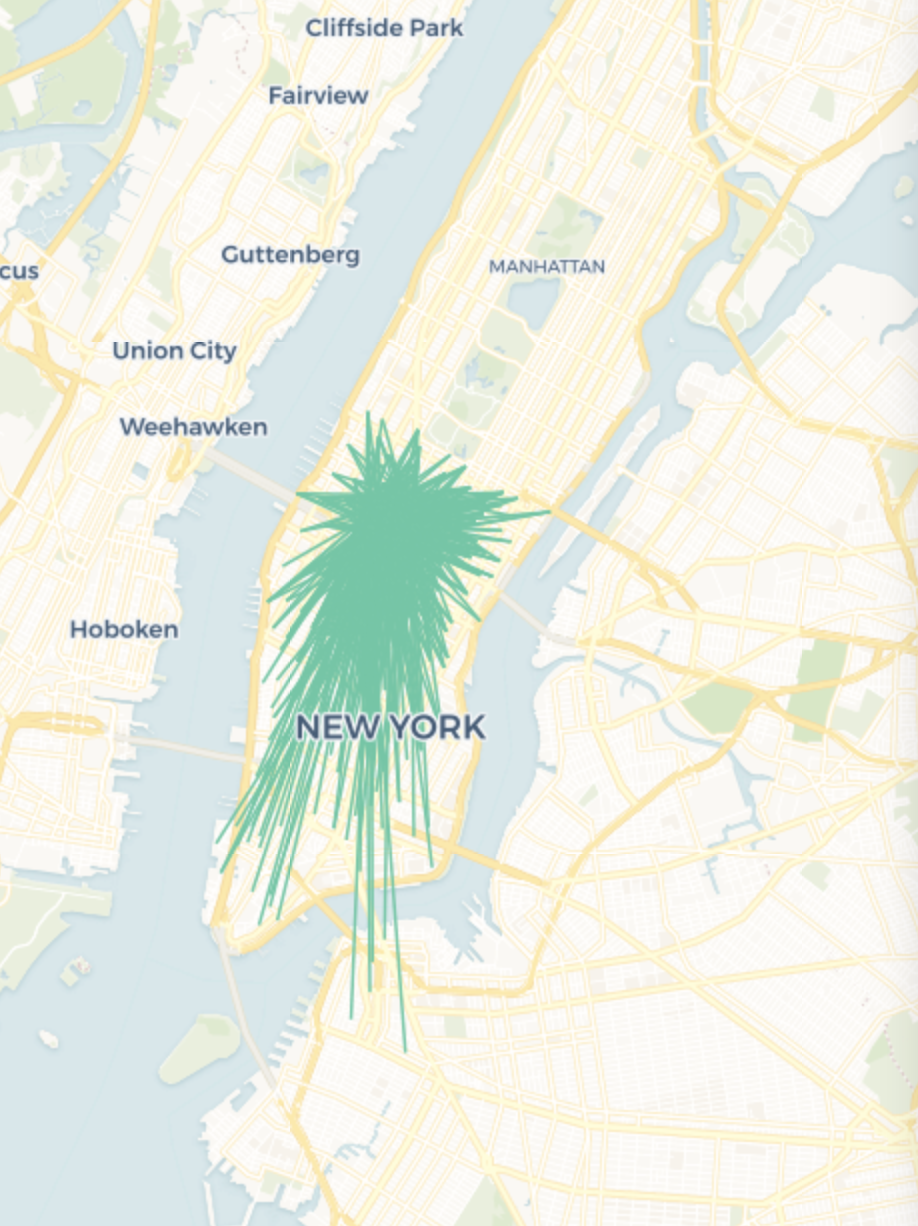

In [19]:
from IPython.display import Image
Image(filename='PUIDATA/makeline.png', width = 400, height= 400)

# extra credit: make the function python 2 and 3 compatible so that it works on the  PUI2016_Python3 kernel

I finished this part in the beginning.